In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
continents = pd.read_csv("C:\\Users\\allis\\OneDrive\\Documents\\UCD\\UCDPA_allisondonohue\\continents2.csv")
world = pd.read_csv("C:\\Users\\allis\\OneDrive\\Documents\\UCD\\UCDPA_allisondonohue\\world_population.csv")

In [2]:
world

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0,1.25
197,Western Sahara,597339,2.55,14876,2,266000,5582,2.4,28,87.0,0.01
198,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0,0.38
199,Zambia,18383955,2.93,522925,25,743390,-8000,4.7,18,45.0,0.24


In [3]:
print(world.shape)
print(world.info())
print(world.head())

(201, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      201 non-null    object 
 1   Population (2020)  201 non-null    int64  
 2   Yearly Change      201 non-null    float64
 3   Net Change         201 non-null    int64  
 4   Density (P/Km²)    201 non-null    int64  
 5   Land Area (Km²)    201 non-null    int64  
 6   Migrants (net)     201 non-null    int64  
 7   Fert. Rate         201 non-null    float64
 8   Med. Age           201 non-null    int64  
 9   Urban Pop %        194 non-null    float64
 10  World Share        201 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 17.4+ KB
None
         Country/Other  Population (2020)  Yearly Change  Net Change  \
0          Afghanistan           38928346           2.33      886592   
1              Albania            2877797        

Adding additional column for Urban Population based on percentages in dataset.

In [4]:
world_upd = world.copy(deep = True)
world_upd["urban_pop_actual"] = world_upd["Population (2020)"]*world_upd["Urban Pop %"]/100

In [5]:
print(world_upd.head())

         Country/Other  Population (2020)  Yearly Change  Net Change  \
0          Afghanistan           38928346           2.33      886592   
1              Albania            2877797          -0.11       -3120   
2              Algeria           43851044           1.85      797990   
3               Angola           32866272           3.27     1040977   
4  Antigua and Barbuda              97929           0.84         811   

   Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  \
0               60           652860          -62920         4.6        18   
1              105            27400          -14000         1.6        36   
2               18          2381740          -10000         3.1        29   
3               26          1246700            6413         5.6        17   
4              223              440               0         2.0        34   

   Urban Pop %  World Share  urban_pop_actual  
0         25.0         0.50        9732086.50  
1       

In [6]:
print(continents.shape)
print(continents.info())
print(continents.head())
continents

(249, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB
None
             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF  

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [7]:
world_cont = world_upd.merge(continents, how = "left", left_on = "Country/Other", right_on = "name")
print(world_cont.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country/Other             201 non-null    object 
 1   Population (2020)         201 non-null    int64  
 2   Yearly Change             201 non-null    float64
 3   Net Change                201 non-null    int64  
 4   Density (P/Km²)           201 non-null    int64  
 5   Land Area (Km²)           201 non-null    int64  
 6   Migrants (net)            201 non-null    int64  
 7   Fert. Rate                201 non-null    float64
 8   Med. Age                  201 non-null    int64  
 9   Urban Pop %               194 non-null    float64
 10  World Share               201 non-null    float64
 11  urban_pop_actual          194 non-null    float64
 12  name                      187 non-null    object 
 13  alpha-2                   186 non-null    object 
 14  alpha-3   

Find 14 countries with no "Region" in dataframe

In [8]:
print(world_cont.loc[world_cont["region"].isnull(), ["Country/Other","Population (2020)"]])

                Country/Other  Population (2020)
21     Bosnia and Herzegovina            3280819
24                     Brunei             437479
34            Channel Islands             173863
45   Czech Republic (Czechia)           10708981
46              Côte d'Ivoire           26378274
47                   DR Congo           89561403
75              Guinea-Bissau            1968001
117                Micronesia             548914
132               North Korea           25778816
133           North Macedonia            2083374
152       Sao Tome & Principe             219159
168  St. Vincent & Grenadines             110940
169        State of Palestine            5101414
186       U.S. Virgin Islands             104425


Manual search for 5 highest populated countries with missing "Region" information.

In [9]:
print(continents.loc[continents["region"] =="Asia",["name"]])

                     name
0             Afghanistan
11                Armenia
15             Azerbaijan
17                Bahrain
18             Bangladesh
25                 Bhutan
33      Brunei Darussalam
38               Cambodia
45                  China
58                 Cyprus
82                Georgia
100             Hong Kong
103                 India
104             Indonesia
105                  Iran
106                  Iraq
109                Israel
112                 Japan
114                Jordan
115            Kazakhstan
118           South Korea
119    Korea, Republic of
120                Kuwait
121            Kyrgyzstan
122                  Laos
124               Lebanon
131                 Macao
134              Malaysia
135              Maldives
147              Mongolia
152               Myanmar
155                 Nepal
167                  Oman
168              Pakistan
170   Palestine, State of
175           Philippines
180                 Qatar
195         

In [10]:
print(continents.loc[continents["region"] =="Europe",["name"]])

                       name
1             Åland Islands
2                   Albania
5                   Andorra
14                  Austria
20                  Belarus
21                  Belgium
28   Bosnia And Herzegovina
34                 Bulgaria
55                  Croatia
59           Czech Republic
60                  Denmark
69                  Estonia
73            Faroe Islands
75                  Finland
76                   France
83                  Germany
85                Gibraltar
86                   Greece
92                 Guernsey
98                 Holy See
101                 Hungary
102                 Iceland
107                 Ireland
108             Isle of Man
110                   Italy
113                  Jersey
123                  Latvia
128           Liechtenstein
129               Lithuania
130              Luxembourg
137                   Malta
145                 Moldova
146                  Monaco
148              Montenegro
156             Neth

In [11]:
print(continents.loc[continents["region"] =="Africa",["name"]])

                                             name
3                                         Algeria
6                                          Angola
23                                          Benin
29                                       Botswana
32                 British Indian Ocean Territory
35                                   Burkina Faso
36                                        Burundi
37                                     Cabo Verde
39                                       Cameroon
42                       Central African Republic
43                                           Chad
49                                        Comoros
50                                          Congo
51             Congo (Democratic Republic Of The)
54                                  Côte D'Ivoire
61                                       Djibouti
65                                          Egypt
67                              Equatorial Guinea
68                                        Eritrea


Update naming convention for 5 highest populated countries with missing "Region" information.

In [12]:
continents_updated = continents
continents_updated["name"] = continents_updated["name"].replace(["Korea, Republic of","Palestine, State of","Czech Republic", "Congo (Democratic Republic Of The)","Côte D'Ivoire"],["North Korea","State of Palestine","Czech Republic (Czechia)","DR Congo","Côte d'Ivoire"])
print(continents_updated.shape)

(249, 11)


Merge updated continent df with updated world df for only those countries with region information available

In [13]:
world_cont_upd = world_upd.merge(continents_updated, left_on = "Country/Other", right_on = "name")
print(world_cont_upd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country/Other             192 non-null    object 
 1   Population (2020)         192 non-null    int64  
 2   Yearly Change             192 non-null    float64
 3   Net Change                192 non-null    int64  
 4   Density (P/Km²)           192 non-null    int64  
 5   Land Area (Km²)           192 non-null    int64  
 6   Migrants (net)            192 non-null    int64  
 7   Fert. Rate                192 non-null    float64
 8   Med. Age                  192 non-null    int64  
 9   Urban Pop %               185 non-null    float64
 10  World Share               192 non-null    float64
 11  urban_pop_actual          185 non-null    float64
 12  name                      192 non-null    object 
 13  alpha-2                   191 non-null    object 
 14  alpha-3   

In [14]:
print(world_cont_upd.describe())

       Population (2020)  Yearly Change    Net Change  Density (P/Km²)  \
count       1.920000e+02     192.000000  1.920000e+02       192.000000   
mean        4.054777e+07       1.221042  4.233696e+05       364.036458   
std         1.485743e+08       1.094193  1.235610e+06      1748.892836   
min         9.792900e+04      -2.470000 -3.838400e+05         2.000000   
25%         2.320154e+06       0.437500  5.917000e+03        31.750000   
50%         9.227860e+06       1.110000  6.337250e+04        88.000000   
75%         2.930910e+07       2.020000  3.770592e+05       223.500000   
max         1.439324e+09       3.840000  1.358663e+07     21645.000000   

       Land Area (Km²)  Migrants (net)  Fert. Rate    Med. Age  Urban Pop %  \
count     1.920000e+02      192.000000  192.000000  192.000000   185.000000   
mean      6.747445e+05      139.723958    2.704687   30.505208    59.524324   
std       1.846204e+06   126153.319130    1.267239    9.098068    22.377218   
min       3.00000

Above shows missing "Urban Pop %" & "urban_pop_actual" information for 7 countries. This information is not available from other areas of the df and a backfill or forward fill would not be appropriate. Missing information will be filled using the mean of the "urban_pop_actual" to maintain the overall mean of the dataframe.


In [15]:
print(world_cont_upd[["urban_pop_actual"]].mean())

urban_pop_actual    2.337753e+07
dtype: float64


In [16]:
world_cont_upd.fillna(world_cont_upd.mean(), inplace =True)
print(world_cont_upd[["urban_pop_actual"]].mean())

urban_pop_actual    2.337753e+07
dtype: float64


In [17]:
print(world_cont_upd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country/Other             192 non-null    object 
 1   Population (2020)         192 non-null    int64  
 2   Yearly Change             192 non-null    float64
 3   Net Change                192 non-null    int64  
 4   Density (P/Km²)           192 non-null    int64  
 5   Land Area (Km²)           192 non-null    int64  
 6   Migrants (net)            192 non-null    int64  
 7   Fert. Rate                192 non-null    float64
 8   Med. Age                  192 non-null    int64  
 9   Urban Pop %               192 non-null    float64
 10  World Share               192 non-null    float64
 11  urban_pop_actual          192 non-null    float64
 12  name                      192 non-null    object 
 13  alpha-2                   191 non-null    object 
 14  alpha-3   

In [18]:
print(list(world_cont_upd.columns.values))

['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'urban_pop_actual', 'name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region', 'sub-region', 'intermediate-region', 'region-code', 'sub-region-code', 'intermediate-region-code']


In [19]:
print(world_cont_upd.shape)

(192, 23)


Drop columns not required  

In [20]:
world_cont_upd_1=world_cont_upd.drop(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'sub-region', 'intermediate-region', 'region-code', 'sub-region-code', 'intermediate-region-code'], axis =1)
print(world_cont_upd_1.shape)

(192, 13)


Create a dataframe with Index from world_cont_upd_1

In [21]:
world_cont_upd_2 =world_cont_upd_1.set_index("Country/Other")

In [22]:
print(list(world_cont_upd_1.columns.values))

['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'urban_pop_actual', 'region']


In [23]:
print(list(world_cont_upd_2.columns.values))

['Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'urban_pop_actual', 'region']


In [24]:
continent_totals_test = world_cont_upd_1.groupby("region").sum()
print(continent_totals_test)

          Population (2020)  Yearly Change  Net Change  Density (P/Km²)  \
region                                                                    
Africa           1338404910         123.63    32482752             6588   
Americas         1022090799          29.65     8106296             5939   
Asia             4640617296          63.69    39679383            50797   
Europe            741741016           1.99      470730             5661   
Oceania            42318354          15.48      547798              910   

          Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  \
region                                                                         
Africa           29619011         -459971       227.3      1185  2690.000000   
Americas         38364496          674995        80.5      1237  2502.572973   
Asia             31027861        -1729116       117.1      1542  2905.097297   
Europe           22055822         1381681        58.7      1560  2709.0000

In [25]:
print(list(continent_totals_test.columns.values))

['Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'urban_pop_actual']


In [26]:
continent_totals = continent_totals_test.drop(["Med. Age", "Urban Pop %"], axis =1)
pd.options.display.float_format = "{:.1f}".format
print(continent_totals)

          Population (2020)  Yearly Change  Net Change  Density (P/Km²)  \
region                                                                    
Africa           1338404910          123.6    32482752             6588   
Americas         1022090799           29.7     8106296             5939   
Asia             4640617296           63.7    39679383            50797   
Europe            741741016            2.0      470730             5661   
Oceania            42318354           15.5      547798              910   

          Land Area (Km²)  Migrants (net)  Fert. Rate  World Share  \
region                                                               
Africa           29619011         -459971       227.3         17.2   
Americas         38364496          674995        80.5         13.1   
Asia             31027861        -1729116       117.1         59.6   
Europe           22055822         1381681        58.7          9.5   
Oceania           8483760          159238        35.7 

In [27]:
continent_totals["Land Area % of world"] = (continent_totals["Land Area (Km²)"]/continent_totals["Land Area (Km²)"].sum())*100

In [28]:
continent_totals["urban_pop%"] = continent_totals["urban_pop_actual"]/continent_totals["Population (2020)"]*100

Density p/Km2 = population / Land Are (Km2)

In [29]:
continent_totals["Density (P/Km²)"] = continent_totals["Population (2020)"]/continent_totals["Land Area (Km²)"]

In [30]:
print(continent_totals)

          Population (2020)  Yearly Change  Net Change  Density (P/Km²)  \
region                                                                    
Africa           1338404910          123.6    32482752             45.2   
Americas         1022090799           29.7     8106296             26.6   
Asia             4640617296           63.7    39679383            149.6   
Europe            741741016            2.0      470730             33.6   
Oceania            42318354           15.5      547798              5.0   

          Land Area (Km²)  Migrants (net)  Fert. Rate  World Share  \
region                                                               
Africa           29619011         -459971       227.3         17.2   
Americas         38364496          674995        80.5         13.1   
Asia             31027861        -1729116       117.1         59.6   
Europe           22055822         1381681        58.7          9.5   
Oceania           8483760          159238        35.7 

Look at the Countries with the Highest & Lowest Values

In [31]:
print(world_cont_upd_2["Population (2020)"].idxmax())

China


Above only gives the Country Name in the result. Below shows all the information for China for not clearly.

In [32]:
print(world_cont_upd_2.loc[world_cont_upd_2["Population (2020)"].idxmax()])

Population (2020)    1439323776
Yearly Change               0.4
Net Change              5540090
Density (P/Km²)             153
Land Area (Km²)         9388211
Migrants (net)          -348399
Fert. Rate                  1.7
Med. Age                     38
Urban Pop %                61.0
World Share                18.5
urban_pop_actual    877987503.4
region                     Asia
Name: China, dtype: object


In [33]:
for high in world_cont_upd_2[["Population (2020)"]].idxmax():
    print(high + " has the highest population")
for low in world_cont_upd_2[["Population (2020)"]].idxmin():
    print(low + " has the lowest population")


China has the highest population
Antigua and Barbuda has the lowest population


This For Loop only produced the country names and would be slow to replicate for each column heading. A definition would be quicker to get the highest and lowest values in the dataframe and return results for the other columns also. 
Initial outputs from a definition of high and low combined were untidy. 
The pd.Dataframe command below (from the internet) creates a new dataframe of the results from the merged table based on the index of the highest or lowest value in the selected column which are printed using the return pd.concat command.


In [34]:
def highlow(x):
    highest_ind = world_cont_upd_2[x].idxmax()
    lowest_ind = world_cont_upd_2[x].idxmin()
    high = pd.DataFrame(world_cont_upd_2.loc[highest_ind,:])
    low = pd.DataFrame(world_cont_upd_2.loc[lowest_ind,:])
    print(world_cont_upd_2[x].idxmax() +" has the highest " + x)
    print(world_cont_upd_2[x].idxmin() +" has the lowest " + x)
    return pd.concat([high,low], axis =1)

highlow("Population (2020)")

China has the highest Population (2020)
Antigua and Barbuda has the lowest Population (2020)


,China,Antigua and Barbuda
Population (2020),1439323776,97929
Yearly Change,0.4,0.8
Net Change,5540090,811
Density (P/Km²),153,223
Land Area (Km²),9388211,440
Migrants (net),-348399,0
Fert. Rate,1.7,2.0
Med. Age,38,34
Urban Pop %,61.0,26.0
World Share,18.5,0.0


In [35]:
highlow("Density (P/Km²)")

Macao has the highest Density (P/Km²)
Mongolia has the lowest Density (P/Km²)


,Macao,Mongolia
Population (2020),649335,3278290
Yearly Change,1.4,1.6
Net Change,8890,53123
Density (P/Km²),21645,2
Land Area (Km²),30,1553560
Migrants (net),5000,-852
Fert. Rate,1.2,2.9
Med. Age,39,28
Urban Pop %,59.5,67.0
World Share,0.0,0.0


In [36]:
highlow("Urban Pop %")

Réunion has the highest Urban Pop %
Papua New Guinea has the lowest Urban Pop %


,Réunion,Papua New Guinea
Population (2020),895312,8947024
Yearly Change,0.7,1.9
Net Change,6385,170915
Density (P/Km²),358,20
Land Area (Km²),2500,452860
Migrants (net),-1256,-800
Fert. Rate,2.3,3.6
Med. Age,36,22
Urban Pop %,100.0,13.0
World Share,0.0,0.1


In [37]:
highlow("Migrants (net)")

United States has the highest Migrants (net)
Venezuela has the lowest Migrants (net)


,United States,Venezuela
Population (2020),331002651,28435940
Yearly Change,0.6,-0.3
Net Change,1937734,-79889
Density (P/Km²),36,32
Land Area (Km²),9147420,882050
Migrants (net),954806,-653249
Fert. Rate,1.8,2.3
Med. Age,38,30
Urban Pop %,83.0,59.5
World Share,4.2,0.4


In [38]:
highlow("Yearly Change")

Niger has the highest Yearly Change
Puerto Rico has the lowest Yearly Change


,Niger,Puerto Rico
Population (2020),24206644,2860853
Yearly Change,3.8,-2.5
Net Change,895929,-72555
Density (P/Km²),19,323
Land Area (Km²),1266700,8870
Migrants (net),4000,-97986
Fert. Rate,7.0,1.2
Med. Age,15,44
Urban Pop %,17.0,59.5
World Share,0.3,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

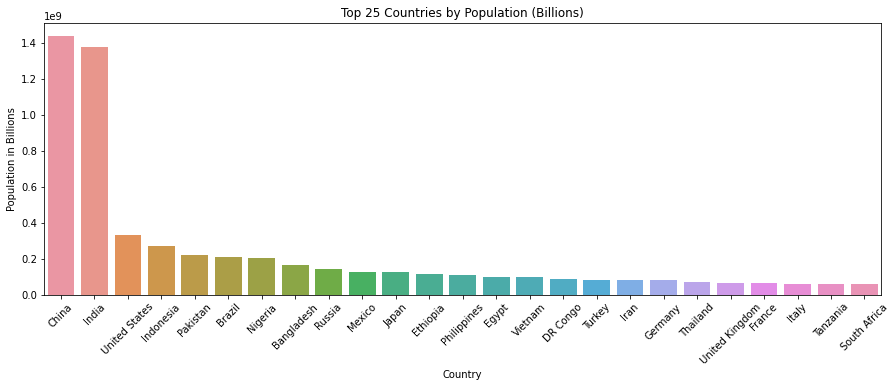

In [39]:
from matplotlib.pyplot import figure
Top_25 = world_cont_upd_1.sort_values("Population (2020)", ascending = False).iloc[:25]
plt.figure(figsize=(15,5))
sns.barplot(x="Country/Other",
            y= "Population (2020)",
            data = Top_25)

plt.ylabel("Population in Billions")
plt.xlabel("Country")
plt.title("Top 25 Countries by Population (Billions)")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

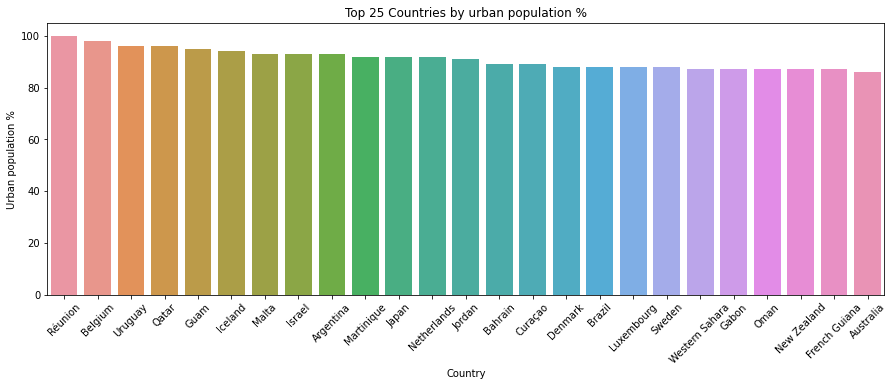

In [40]:
highest_urban_25 = world_cont_upd_1.sort_values("Urban Pop %", ascending = False).iloc[:25]
plt.figure(figsize=(15,5))
sns.barplot(x="Country/Other",
            y= "Urban Pop %",
            data = highest_urban_25)

plt.ylabel("Urban population %")
plt.xlabel("Country")
plt.title("Top 25 Countries by urban population %")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

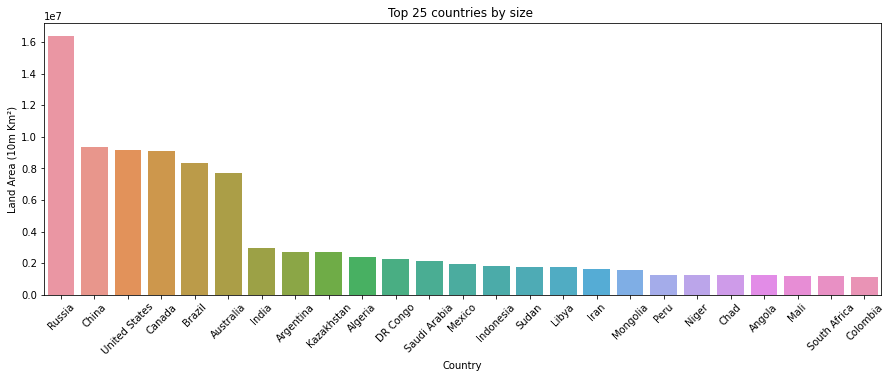

In [41]:
highest_area_25 = world_cont_upd_1.sort_values("Land Area (Km²)", ascending = False).iloc[:25]
plt.figure(figsize=(15,5))
sns.barplot(x="Country/Other",
            y= "Land Area (Km²)",
            data = highest_area_25)

plt.ylabel("Land Area (10m Km²)")
plt.xlabel("Country")
plt.title("Top 25 countries by size ")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

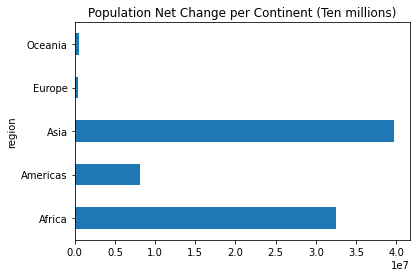

In [42]:
continent_totals["Net Change"].plot(kind = "barh", title = "Population Net Change per Continent (Ten millions)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

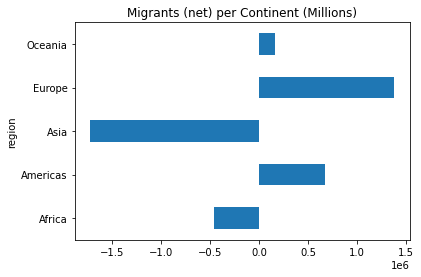

In [43]:
continent_totals["Migrants (net)"].plot(kind = "barh", title = "Migrants (net) per Continent (Millions)")
plt.show

In [44]:
continent_totals_ri = continent_totals.reset_index()
print(continent_totals_ri)

     region  Population (2020)  Yearly Change  Net Change  Density (P/Km²)  \
0    Africa         1338404910          123.6    32482752             45.2   
1  Americas         1022090799           29.7     8106296             26.6   
2      Asia         4640617296           63.7    39679383            149.6   
3    Europe          741741016            2.0      470730             33.6   
4   Oceania           42318354           15.5      547798              5.0   

   Land Area (Km²)  Migrants (net)  Fert. Rate  World Share  urban_pop_actual  \
0         29619011         -459971       227.3         17.2       587257514.9   
1         38364496          674995        80.5         13.1       882248106.1   
2         31027861        -1729116       117.1         59.6      2437137227.3   
3         22055822         1381681        58.7          9.5       553118587.8   
4          8483760          159238        35.7          0.5        28723799.9   

   Land Area % of world  urban_pop%  
0     

Text(0.5, 1.0, 'Urban Population by Continent (Billions)')

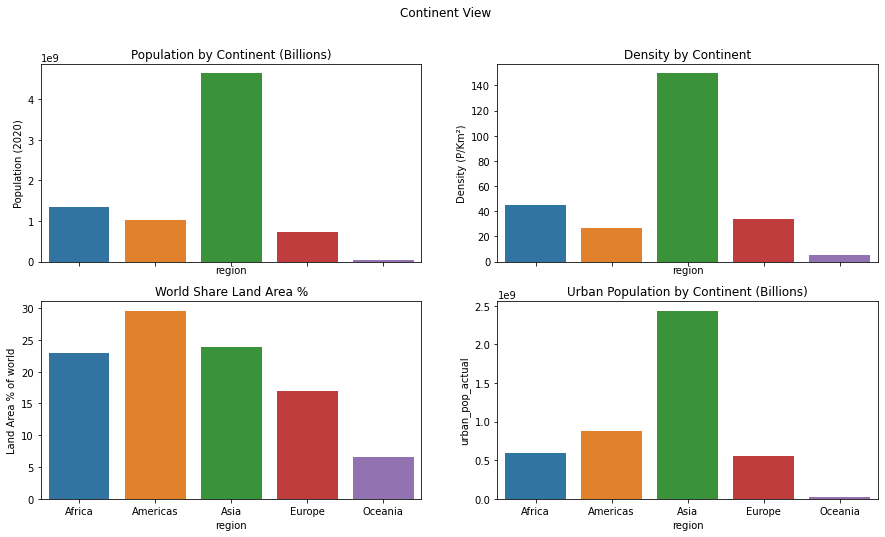

In [45]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,8))
fig.suptitle('Continent View')
sns.barplot(ax=axes[0,0],data = continent_totals_ri, x = "region", y = "Population (2020)")
sns.barplot(ax=axes[0,1],data = continent_totals_ri, x = "region", y = "Density (P/Km²)")
sns.barplot(ax=axes[1,0],data = continent_totals_ri, x = "region", y = "Land Area % of world")
sns.barplot(ax=axes[1,1],data = continent_totals_ri, x = "region", y = "urban_pop_actual")
axes[0,0].set_title("Population by Continent (Billions)")
axes[0,1].set_title("Density by Continent")
axes[1,0].set_title("World Share Land Area %")
axes[1,1].set_title("Urban Population by Continent (Billions)")

In [46]:
fig = plt.figure(figsize=(15,8), dpi=1600)
fig.suptitle('Continent View', fontsize =20,bbox={'facecolor':'0.8', 'pad':5})
labels = continent_totals_ri["region"]
ax1 = plt.subplot2grid((2,2),(0,0))
ax1_sizes = continent_totals_ri["Population (2020)"]
ax1.pie(ax1_sizes,labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title ("World Share - Population",bbox={'facecolor':'0.8', 'pad':5}, loc="left")

ax2 = plt.subplot2grid((2,2),(1,0))
ax2_sizes = continent_totals_ri["Land Area % of world"]
ax2.pie(ax2_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal') 
plt.title ("World Share - Land Area",bbox={'facecolor':'0.8', 'pad':5}, loc="left")

ax3 = plt.subplot2grid((2,2),(0,1))
ax3_sizes = continent_totals_ri["Density (P/Km²)"]
ax3.pie(ax3_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax3.axis('equal') 
plt.title ("World Share - Density (P/Km²)",bbox={'facecolor':'0.8', 'pad':5}, loc="left")

ax4 = plt.subplot2grid((2,2),(1,1))
ax4_sizes = continent_totals_ri["urban_pop_actual"]
ax4.pie(ax4_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax4.axis('equal') 
plt.title ("World Share - Urban Population",bbox={'facecolor':'0.8', 'pad':5}, loc="left")



plt.show()